# Data Exploration

## Setup Instructions

In [1]:
!pip install -r ../requirements.txt

Import necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os

In [3]:
# Get working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

Current working directory: /Users/htdvu/Desktop/myLab/myLab-HDAC6-results/eda


Import working dataset and display first few rows.

In [5]:
df = pd.read_csv('../data/20250905_egfr_train_test_data.csv')
df.head(10)

,ID,SMILES,acqualifier,IC50 value(nM),doi,inchikey,Label
0,44416433,CN1CC2=CC(=C(C=C2OC3=C1C(=NC=N3)OC4=CC(=CC=C4)...,=,1200.0,10.1016/j.bmcl.2006.07.031,AABTVDZTFBSBKN-UHFFFAOYSA-N,inactive
1,24905296,CCOC1=C(C=C(C=C1)C2=NN(C3=NC=NC(=C23)N)C4CCCC4)OC,=,1400.0,10.1038/nchembio.117,AAHKGRWRYBCWDL-UHFFFAOYSA-N,inactive
2,CHEMBL553,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,=,20.0,10.1016/j.bmc.2009.11.037,AAKJLRGGTJKAMG-UHFFFAOYSA-N,active
3,CHEMBL595757,COc1ccccc1C(Cc1coc2nc(N)nc(N)c12)C(C)C,=,18200.0,10.1016/j.bmc.2009.08.044,AALMZTNNZVHOAS-UHFFFAOYSA-N,inactive
4,CHEMBL3741026,C#Cc1cccc(Nc2ncnc3cc(OCCOC(=O)C(C)c4ccc(CC(C)C...,=,9.0,10.1021/acsmedchemlett.5b00286,AALSIMHTWOFTTB-UHFFFAOYSA-N,active
5,CHEMBL3758758,COC(=O)c1ccc(OC)c(-c2cc3c(N[C@H](C)c4ccccc4)nc...,=,7.0,10.1016/j.ejmech.2015.11.012,AARBVSHAOOSSTN-CQSZACIVSA-N,active
6,CHEMBL354033,Nc1ncnc2c1c(-c1ccc(O)cc1)cn2C1CCNC1,=,2670.0,10.1016/s0960-894x(01)00080-4,AATOPLAJLQECRD-UHFFFAOYSA-N,inactive
7,57400361,COC1=C(C=C2C(=C1)C(=C(C=N2)C(=O)O)NC3=CC(=C(C=...,=,9284.0,10.1016/j.ejmech.2012.01.021,AAVGHUCVRHUVEM-UHFFFAOYSA-N,inactive
8,46842883,CC1=CC=C(C=C1)C2CC(=NN2C(=S)N)C3=CC(=C(C=C3)C)C,=,340.0,10.1016/j.bmc.2010.05.034,AAXJTXUUVCETME-UHFFFAOYSA-N,inactive
9,126717966,C1CCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(C=C4)CNC(...,NaN,5500.0,NaN,ABAPXGKEVNECFX-UHFFFAOYSA-N,inactive


* **ID** → A unique identifier for each compound in the dataset (often just a running number or database reference).
* **SMILES** → The **Simplified Molecular Input Line Entry System** string, which encodes the molecular structure as text (atoms, bonds, stereochemistry, etc.). Used for computational chemistry and machine learning.
* **acqualifier** → Usually describes the **assay qualifier** for the IC50 value. For example:

  * `"="` → exact IC50 value
  * `"<"` or `">"` → means the IC50 is below/above the given number (censored data).
* **IC50 value (nM)** → The half maximal inhibitory concentration of the compound (nanomolar). Lower IC50 = stronger inhibition against HDAC6.
* **doi** → The **Digital Object Identifier** of the publication where this measurement was reported. Lets you trace back to the experimental source.
* **inchikey** → A **hashed, fixed-length representation of the InChI** (International Chemical Identifier) of a molecule.

  * InChI is a standard textual identifier that encodes a chemical structure.
  * InChIKey is a **shortened, fixed 27-character string** (like a fingerprint) that is easy to search in databases.
  * Example: Aspirin has InChIKey `BSYNRYMUTXBXSQ-UHFFFAOYSA-N`.
  * Purpose: unique, database-searchable ID for a molecule, independent of SMILES formatting.
* **Label** → The machine learning target label. In bioactivity datasets, this is often:

  * `"active"` / `"inactive"` based on an IC50 cutoff (e.g., <1000 nM = active, otherwise inactive).
  * Or a numeric class depending on how the dataset was curated.


### In summary
- **ID**: Unique identifier of the compound.
- **SMILES**: Text representation of the molecular structure.
- **acqualifier**: Assay qualifier indicating whether the IC50 value is exact (=), less than (<), or greater than (>).
- **IC50 value (nM)**: The inhibitory concentration at which the compound achieves 50% activity against HDAC6, in nanomolar units.
- **doi**: Digital Object Identifier of the publication reporting the measurement.
- **inchikey**: Standardized, hashed chemical identifier derived from InChI; provides a unique, fixed-length ID for each molecule.
- **Label**: Bioactivity class label (e.g., active/inactive) derived from IC50 thresholds.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5644 non-null   object 
 1   SMILES          5644 non-null   object 
 2   acqualifier     4402 non-null   object 
 3   IC50 value(nM)  5644 non-null   float64
 4   doi             4101 non-null   object 
 5   inchikey        5644 non-null   object 
 6   Label           5644 non-null   object 
dtypes: float64(1), object(6)
memory usage: 308.8+ KB


In [7]:
df.describe()

,IC50 value(nM)
count,5.644000e+03
mean,3.499930e+04
std,8.836852e+05
min,4.000000e-03
25%,8.000000e+00
50%,1.000000e+02
75%,1.322500e+03
max,5.500000e+07



## EDA

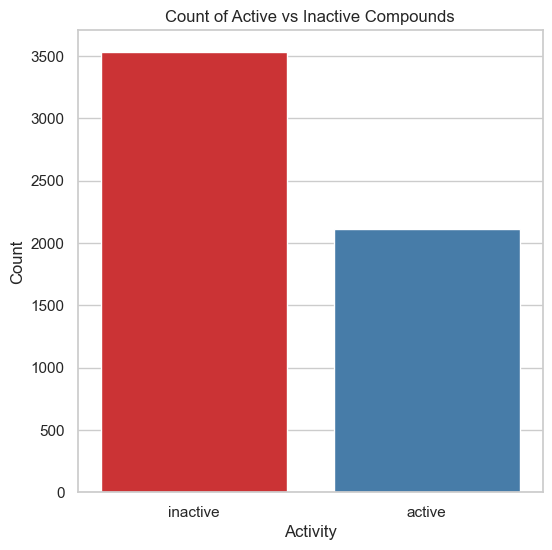

In [40]:
# Count active/inactive compounds
plt.figure(figsize=(6, 6))
sns.countplot(x='Label', data=df, palette='Set1', hue='Label')
plt.title('Count of Active vs Inactive Compounds')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.savefig('res/active_inactive_count.png')
plt.show()

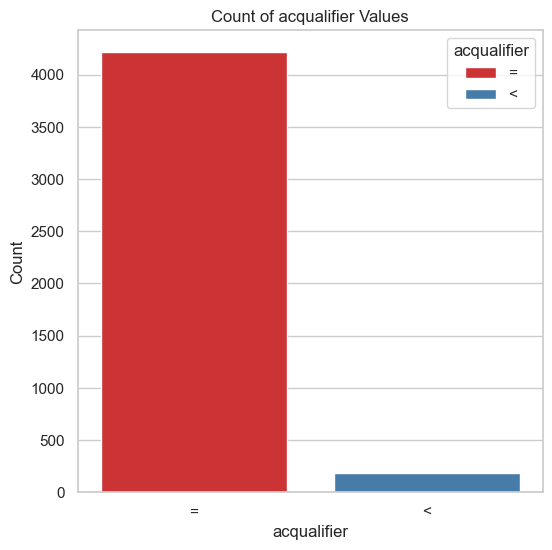

In [39]:
# Count acqualifier
plt.figure(figsize=(6, 6))
sns.countplot(x='acqualifier', data=df, palette='Set1', hue='acqualifier')
plt.title('Count of acqualifier Values')
plt.xlabel('acqualifier')   
plt.ylabel('Count')
plt.savefig('res/acqualifier_count.png')
plt.show()

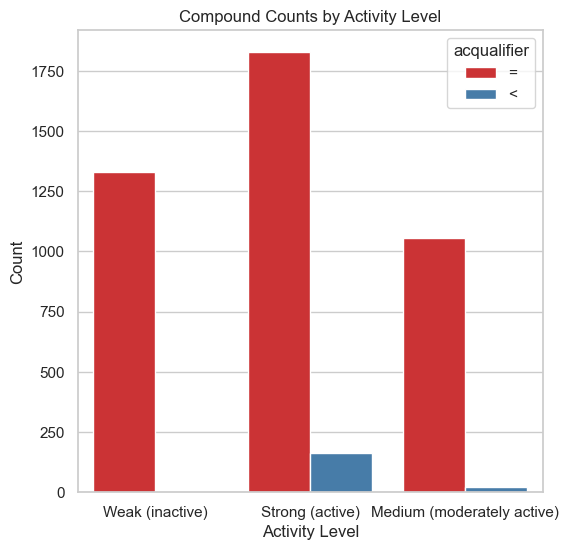

In [38]:
# Define activity level categories based on IC50 (nM)
def categorize_activity(ic50):
    if ic50 < 100:
        return "Strong (active)"
    elif 100 <= ic50 <= 1000:
        return "Medium (moderately active)"
    else:
        return "Weak (inactive)"

df['Activity_Level'] = df['IC50 value(nM)'].apply(categorize_activity)

# Plot distribution of activity levels
plt.figure(figsize=(6, 6))
sns.countplot(x='Activity_Level', data=df, palette='Set1', hue='acqualifier')
plt.title('Compound Counts by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Count')
plt.savefig('res/activity_level_count.png')
plt.show()
